In [1]:
import os
import tensorflow as tf
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [2]:
unlabelled_imgs = os.listdir("frames")
unlabelled_imgs = [i for i in unlabelled_imgs if i.split(".")[-1] == "jpg"]

In [3]:
len(unlabelled_imgs)

8444

In [4]:
categories = os.listdir("labelled")
categories

['bramka',
 'closeup2_group',
 'closeup2_single',
 'closeup_group',
 'closeup_single',
 'crowd',
 'faul',
 'playingfield']

In [5]:
X, X_names = [], []
y = []

for category in categories:
    imgs = os.listdir(f"labelled/{category}")
    for img in imgs:
        X_names.append(img)
        X.append(cv2.imread(f"labelled/{category}/{img}"))
        y.append(categories.index(category))    

In [6]:
len(X)

1729

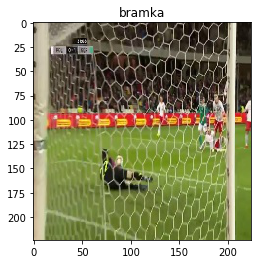

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

id_ = 72

img_path = f"{os.getcwd()}\\labelled\\{categories[y[id_]]}\\{X_names[id_]}"

plt.imshow(Image.open(img_path))
plt.title(categories[y[id_]])
plt.show()

In [8]:
from random import shuffle
import random

random.seed(22)
data = []

for i in range(len(X)):
    data.append([X[i], y[i]])
    
shuffle(data)

In [9]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(1729, 224, 224, 3)
(1729,)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as ly

model = Sequential()
model.add(ly.Conv2D(96, (11, 11), strides=(4, 4), input_shape=(224, 224, 3), activation="relu"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))
          
model.add(ly.Conv2D(256, (5, 5), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))

model.add(ly.Conv2D(384, (3, 3), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
          
model.add(ly.Conv2D(384, (1, 1), strides=(1, 1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
          
model.add(ly.Conv2D(256, (1, 1), strides=(1,1), activation="relu", padding="same"))
model.add(ly.BatchNormalization())
model.add(ly.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(ly.Flatten())
          
model.add(ly.Dense(4096, activation="relu"))
model.add(ly.Dropout(0.5))

model.add(ly.Dense(4096, activation="relu"))
model.add(ly.Dropout(0.5))
          
model.add(ly.Dense(len(categories), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       8

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

In [12]:
history = model.fit(X, y, epochs=70)

Epoch 1/70
55/55 [==============================] - 5s 96ms/step - loss: 1.9853 - accuracy: 0.5795
Epoch 2/70
55/55 [==============================] - 4s 81ms/step - loss: 1.5293 - accuracy: 0.6501
Epoch 3/70
55/55 [==============================] - 4s 80ms/step - loss: 1.2546 - accuracy: 0.6802
Epoch 4/70
55/55 [==============================] - 4s 80ms/step - loss: 1.0457 - accuracy: 0.7149
Epoch 5/70
55/55 [==============================] - 5s 90ms/step - loss: 1.0284 - accuracy: 0.7114
Epoch 6/70
55/55 [==============================] - 128s 2s/step - loss: 0.8353 - accuracy: 0.7444
Epoch 7/70
55/55 [==============================] - 5s 86ms/step - loss: 0.7482 - accuracy: 0.7606 0s - loss: 0.7409 - 
Epoch 8/70
55/55 [==============================] - 4s 82ms/step - loss: 0.8170 - accuracy: 0.7675
Epoch 9/70
55/55 [==============================] - ETA: 0s - loss: 0.7314 - accuracy: 0.77 - 4s 78ms/step - loss: 0.7330 - accuracy: 0.7785
Epoch 10/70
55/55 [===========================

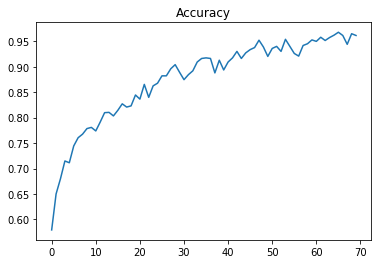

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.title("Accuracy")
plt.show()

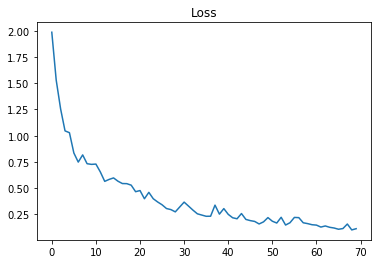

In [16]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.show()

In [94]:
from tqdm import tqdm

In [ ]:
imgs = np.array([])
img_names = []

for i in tqdm([img for img in os.listdir("test") if img.split(".")[-1] == "jpg"]):
    img = cv2.imread(f"test/{i}")
#     img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs = np.append(imgs, img)
    img_names.append(i)

 18%|█████████▊                                            | 1532/8444 [09:44<1:25:56,  1.34it/s]

In [ ]:
imgs = np.array(imgs).reshape(-1, 224, 224, 3)
imgs.shape

In [ ]:
predicted_labels = model.predict(imgs)

In [ ]:
from matplotlib import rcParams

rcParams["figure.figsize"] = 10, 10

In [ ]:
cols = 5
rows = cols

fig, ax = plt.subplots(nrows=rows, ncols=cols)
k = 0
for i in range(rows):
    for j in range(cols):
        lab = categories[np.argmax(predicted_labels[k])]
        ax[i, j].set_title(lab)
        ax[i, j].imshow((imgs[k]).astype(np.uint8))
        k += 1
plt.show()

In [ ]:
for i in range(len(img_names)):
    cat = categories[np.argmax(predicted_labels[i])]
    os.replace(f"test/{img_names[i]}", f"test/{cat}/{img_names[i]}")